In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score
from pprint import pprint

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')
# df = pd.read_csv("/content/drive/MyDrive/Eli Lilly/data/dataset/train.csv")

In [3]:
df = pd.read_csv("D:/Sashank/Music Data/train.csv")

In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15681 entries, 0 to 15680
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   instance_id        15681 non-null  object 
 1   track_name         15681 non-null  object 
 2   popularity         15039 non-null  float64
 3   acousticness       15681 non-null  float64
 4   danceability       15125 non-null  float64
 5   duration_ms        15587 non-null  float64
 6   energy             15587 non-null  float64
 7   instrumentalness   15586 non-null  float64
 8   key                15681 non-null  object 
 9   liveness           15681 non-null  float64
 10  loudness           15645 non-null  float64
 11  voice_gender       14916 non-null  object 
 12  mode               15646 non-null  object 
 13  speechiness        15655 non-null  float64
 14  tempo              15681 non-null  object 
 15  musician_category  14321 non-null  object 
 16  valence            150

In [5]:
#Dropping NaN Rows from data set 
df1 = df.copy(deep=True)

In [6]:
df.isna().any()

instance_id          False
track_name           False
popularity            True
acousticness         False
danceability          True
duration_ms           True
energy                True
instrumentalness      True
key                  False
liveness             False
loudness              True
voice_gender          True
mode                  True
speechiness           True
tempo                False
musician_category     True
valence               True
music_genre          False
dtype: bool

In [7]:
df1.dropna(axis=0,how="any",inplace=True)


In [8]:
df1.isna().any()

instance_id          False
track_name           False
popularity           False
acousticness         False
danceability         False
duration_ms          False
energy               False
instrumentalness     False
key                  False
liveness             False
loudness             False
voice_gender         False
mode                 False
speechiness          False
tempo                False
musician_category    False
valence              False
music_genre          False
dtype: bool

In [9]:
print(df.shape,df1.shape)

(15681, 18) (11756, 18)


In [10]:
df_mode = df1["mode"]

In [11]:
df1.replace("?",np.nan, inplace=True)

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11756 entries, 1 to 15680
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   instance_id        11756 non-null  object 
 1   track_name         11756 non-null  object 
 2   popularity         11756 non-null  float64
 3   acousticness       11756 non-null  float64
 4   danceability       11756 non-null  float64
 5   duration_ms        11756 non-null  float64
 6   energy             11756 non-null  float64
 7   instrumentalness   11756 non-null  float64
 8   key                11756 non-null  object 
 9   liveness           11756 non-null  float64
 10  loudness           11756 non-null  float64
 11  voice_gender       11756 non-null  object 
 12  mode               10938 non-null  object 
 13  speechiness        11756 non-null  float64
 14  tempo              10653 non-null  object 
 15  musician_category  11756 non-null  object 
 16  valence            117

In [13]:
df1.dropna(axis=0,how="any",inplace=True)


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9919 entries, 2 to 15680
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   instance_id        9919 non-null   object 
 1   track_name         9919 non-null   object 
 2   popularity         9919 non-null   float64
 3   acousticness       9919 non-null   float64
 4   danceability       9919 non-null   float64
 5   duration_ms        9919 non-null   float64
 6   energy             9919 non-null   float64
 7   instrumentalness   9919 non-null   float64
 8   key                9919 non-null   object 
 9   liveness           9919 non-null   float64
 10  loudness           9919 non-null   float64
 11  voice_gender       9919 non-null   object 
 12  mode               9919 non-null   object 
 13  speechiness        9919 non-null   float64
 14  tempo              9919 non-null   object 
 15  musician_category  9919 non-null   object 
 16  valence            9919

In [15]:
df1["tempo"]

2        105.01799999999999
4        112.18299999999999
6        104.95700000000001
8        176.64700000000002
9                   117.155
                ...        
15675                73.166
15676               123.516
15677               129.445
15679    116.07700000000001
15680                  94.2
Name: tempo, Length: 9919, dtype: object

In [16]:
s = df1["tempo"] 
s = pd.to_numeric(s)

In [17]:
df1["tempo"] = s

In [18]:
df1["tempo"]

2        105.018
4        112.183
6        104.957
8        176.647
9        117.155
          ...   
15675     73.166
15676    123.516
15677    129.445
15679    116.077
15680     94.200
Name: tempo, Length: 9919, dtype: float64

In [19]:
mylist = list(df1.select_dtypes(include=['object']).columns)

In [20]:
mylist



['instance_id',
 'track_name',
 'key',
 'voice_gender',
 'mode',
 'musician_category',
 'music_genre']

In [21]:
df1 = df1.drop(columns=['instance_id','track_name'])

In [22]:
df1

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence,music_genre
2,89.023,0.020041,0.967948,273314.723,0.857411,0.000000,Scale D,0.042030,-4.995,Female,Major,0.119917,105.018,Band,0.635525,Rap
4,45.095,0.858769,0.280645,410136.987,0.114732,0.002753,Scale F Sharp,0.134782,-26.922,Female,Minor,0.039139,112.183,Band,0.074412,Classical
6,64.265,0.000459,0.968723,203145.857,-1.000000,0.000384,Scale C Sharp,0.079220,-7.266,Male,Major,0.052014,104.957,Band,0.484246,Rap
8,73.420,0.090830,0.380147,275490.630,0.714246,0.000000,Scale A,0.089873,-5.972,Both,Major,0.070437,176.647,Duet,0.555169,Rock
9,34.034,1.014646,0.672051,207299.190,0.048039,0.146346,Scale A Sharp,0.110850,-27.213,Both,Major,0.065935,117.155,Duet,0.590628,Jazz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15675,28.318,1.054190,0.136130,188388.500,0.042151,1.024128,Scale G,0.135912,-29.236,Female,Major,0.057739,73.166,Solo,0.040686,Classical
15676,0.000,0.866988,0.387476,-1.000,0.196799,0.028725,Scale B,0.248399,-16.331,Female,Major,0.045251,123.516,Band,0.624518,Classical
15677,40.514,0.883333,0.459917,378128.464,0.349263,0.000519,Scale F,0.681492,-25.087,Both,Major,0.448377,129.445,Duet,0.609022,Jazz
15679,59.693,0.113408,0.644554,151226.592,0.912201,0.000089,Scale F,0.166336,-7.257,Both,Minor,0.060308,116.077,Duet,0.402700,Rock


In [23]:
from sklearn.compose import make_column_selector as selector
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

In [24]:
X = df1.iloc[ : , :-1]
X.shape
Y = df1["music_genre"]

In [25]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
target= lb.fit_transform(Y)
Y = pd.DataFrame(target)


In [26]:
y = Y.squeeze()

In [27]:
y.shape

(9919,)

In [28]:
numerical_columns = numerical_columns_selector(X)
categorical_columns = categorical_columns_selector(X)

In [29]:
categorical_columns = list(categorical_columns)
categorical_columns

['key', 'voice_gender', 'mode', 'musician_category']

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

preprocessing = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(), categorical_columns),
        ("Scale", MinMaxScaler(), numerical_columns)]
)
x = preprocessing.fit_transform(X)
x = pd.DataFrame(x)
x

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.018311,0.902400,0.080142,0.887279,0.000000,0.022379,0.882529,0.098362,0.382038,0.590104
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.784686,0.215721,0.120262,0.532503,0.002553,0.109658,0.450206,0.015648,0.420772,0.069094
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.000417,0.903174,0.059567,0.000000,0.000356,0.057374,0.837753,0.028831,0.381709,0.449637
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.082993,0.315132,0.080780,0.818889,0.000000,0.067399,0.863266,0.047696,0.769256,0.515491
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.927117,0.606771,0.060785,0.500645,0.135681,0.087138,0.444469,0.043086,0.447650,0.548416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.963249,0.071337,0.055240,0.497832,0.949496,0.110721,0.404582,0.034693,0.209851,0.037778
9915,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.792196,0.322454,0.000000,0.571707,0.026631,0.216570,0.659023,0.021906,0.482036,0.579883
9916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.807131,0.394829,0.110876,0.644538,0.000481,0.624106,0.486386,0.434696,0.514088,0.565495
9917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.103623,0.579299,0.044343,0.913452,0.000082,0.139350,0.837931,0.037324,0.441822,0.373919


In [234]:
categorical_columns

['key', 'voice_gender', 'mode', 'musician_category']

In [305]:
from sklearn.compose import make_column_transformer, make_column_selector

ohn = OneHotEncoder()
scale = MinMaxScaler()

ohn_ct = make_column_transformer(
    (ohn, ['key', 'voice_gender', 'mode', 'musician_category']),
    remainder = 'passthrough' 
)

df_ohn = ohn_ct.fit_transform(X)
df_ohn = pd.DataFrame(df_ohn)


In [285]:
test = list(ohn_ct.get_feature_names_out())[:-11]

In [306]:
test1 = list(ohn_ct.get_feature_names_out())[-11:]


In [307]:
new_list = [s.replace("onehotencoder__", " ") for s in list(ohn_ct.get_feature_names_out())[:-11]]
print(new_list)


[' key_Scale A', ' key_Scale A Sharp', ' key_Scale B', ' key_Scale C', ' key_Scale C Sharp', ' key_Scale D', ' key_Scale D Sharp', ' key_Scale E', ' key_Scale F', ' key_Scale F Sharp', ' key_Scale G', ' key_Scale G Sharp', ' voice_gender_Both', ' voice_gender_Female', ' voice_gender_Male', ' mode_Major', ' mode_Minor', ' musician_category_Band', ' musician_category_Duet', ' musician_category_Solo']


In [308]:
new_list1 = [s.replace("remainder__", " ") for s in list(ohn_ct.get_feature_names_out())[-11:]]
print(new_list1)

[' popularity',
 ' acousticness',
 ' danceability',
 ' duration_ms',
 ' energy',
 ' instrumentalness',
 ' liveness',
 ' loudness',
 ' speechiness',
 ' tempo',
 ' valence']

In [311]:
cols  = new_list +new_list1
len(cols)

31

In [309]:
df_ohn.columns = cols

In [310]:
df_ohn

,key_Scale A,key_Scale A Sharp,key_Scale B,key_Scale C,key_Scale C Sharp,key_Scale D,key_Scale D Sharp,key_Scale E,key_Scale F,key_Scale F Sharp,...,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.020041,0.967948,273314.723,0.857411,0.000000,0.042030,-4.995,0.119917,105.018,0.635525
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.858769,0.280645,410136.987,0.114732,0.002753,0.134782,-26.922,0.039139,112.183,0.074412
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.000459,0.968723,203145.857,-1.000000,0.000384,0.079220,-7.266,0.052014,104.957,0.484246
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.090830,0.380147,275490.630,0.714246,0.000000,0.089873,-5.972,0.070437,176.647,0.555169
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.014646,0.672051,207299.190,0.048039,0.146346,0.110850,-27.213,0.065935,117.155,0.590628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.054190,0.136130,188388.500,0.042151,1.024128,0.135912,-29.236,0.057739,73.166,0.040686
9915,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.866988,0.387476,-1.000,0.196799,0.028725,0.248399,-16.331,0.045251,123.516,0.624518
9916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.883333,0.459917,378128.464,0.349263,0.000519,0.681492,-25.087,0.448377,129.445,0.609022
9917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.113408,0.644554,151226.592,0.912201,0.000089,0.166336,-7.257,0.060308,116.077,0.402700


In [300]:
df_ohn.columns[-11:]


Index([' popularity', ' acousticness', ' danceability', ' duration_ms',
       ' energy', ' instrumentalness', ' liveness', ' loudness',
       ' speechiness', ' tempo', ' valence'],
      dtype='object')

In [316]:
ohn_num = make_column_transformer(
    (scale, new_list1) ,
    remainder = 'passthrough' 
)

num = ohn_num.fit_transform(df_ohn)
df_final = pd.DataFrame(num)


In [321]:
df_final.columns = cols

In [322]:
df_final.columns

Index([' key_Scale A', ' key_Scale A Sharp', ' key_Scale B', ' key_Scale C',
       ' key_Scale C Sharp', ' key_Scale D', ' key_Scale D Sharp',
       ' key_Scale E', ' key_Scale F', ' key_Scale F Sharp', ' key_Scale G',
       ' key_Scale G Sharp', ' voice_gender_Both', ' voice_gender_Female',
       ' voice_gender_Male', ' mode_Major', ' mode_Minor',
       ' musician_category_Band', ' musician_category_Duet',
       ' musician_category_Solo', ' popularity', ' acousticness',
       ' danceability', ' duration_ms', ' energy', ' instrumentalness',
       ' liveness', ' loudness', ' speechiness', ' tempo', ' valence'],
      dtype='object')

In [323]:
from sklearn.model_selection import  train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(df_final,y,test_size=0.2)

In [324]:
from sklearn.feature_selection import SelectKBest
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

k_range = list(range(1,15))
scores = []
error = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train.values.ravel())
    y_pred = knn.predict(X_test)
    accuracy_score(Y_test, y_pred)
    scores.append(metrics.accuracy_score(Y_test,y_pred))
    error.append(np.mean(y_pred != Y_test))

scores= np.mean(scores)
print(scores)

0.5999423963133641


In [33]:
from sklearn.model_selection import cross_val_score

k_range = list(range(1, 15))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

In [34]:
print(k_scores)

[0.5595433595598769, 0.5180829741345082, 0.5558896960495011, 0.5803350157708667, 0.5926828261138869, 0.5948235664075776, 0.5916716165694156, 0.5950751379355254, 0.5931870809126456, 0.5929359858459252, 0.5865088415321723, 0.5886529170544532, 0.5832328529545361, 0.5794513390148687]


Text(0, 0.5, 'Cross-Validated Accuracy')

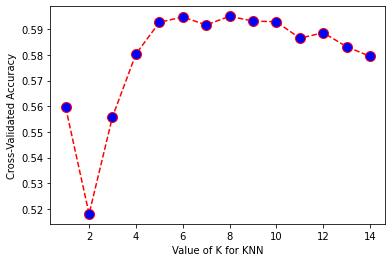

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

Text(0, 0.5, 'Mean Error')

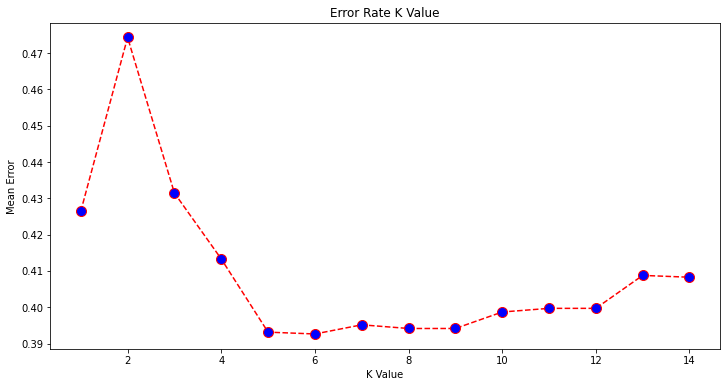

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(k_range, error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [38]:
# Best Value of K
knn = KNeighborsClassifier(n_neighbors=8)
knn_base = knn.fit(X_train,Y_train)
y_pred_knn_base = knn.predict(X_test)
print(accuracy_score(Y_test, y_pred_knn_base))
#print(cross_val_score(knn,X_test,Y_test, cv=10, scoring="accuracy").mean())


0.6058467741935484


0.6063508064516129


## GridSearch


In [39]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 15))
weight_options = ['uniform', 'distance']
algorithms = [ 'ball_tree', 'kd_tree', 'brute']


In [40]:
param_grid = dict(n_neighbors=k_range, weights = weight_options, algorithm = algorithms)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree', 'brute']}


In [41]:
from sklearn.metrics import f1_score, make_scorer

f1 = make_scorer(f1_score , average='macro')


In [43]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy',n_jobs = -1)
grid.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=8), n_jobs=-1,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [44]:
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]


,mean_test_score,std_test_score,params
0,0.559543,0.016014,"{'algorithm': 'ball_tree', 'n_neighbors': 1, '..."
1,0.559543,0.016014,"{'algorithm': 'ball_tree', 'n_neighbors': 1, '..."
2,0.518083,0.014691,"{'algorithm': 'ball_tree', 'n_neighbors': 2, '..."
3,0.559543,0.016014,"{'algorithm': 'ball_tree', 'n_neighbors': 2, '..."
4,0.555890,0.013637,"{'algorithm': 'ball_tree', 'n_neighbors': 3, '..."
...,...,...,...
79,0.600750,0.017092,"{'algorithm': 'brute', 'n_neighbors': 12, 'wei..."
80,0.583233,0.015642,"{'algorithm': 'brute', 'n_neighbors': 13, 'wei..."
81,0.597726,0.018095,"{'algorithm': 'brute', 'n_neighbors': 13, 'wei..."
82,0.579451,0.015202,"{'algorithm': 'brute', 'n_neighbors': 14, 'wei..."


In [45]:
grid_mean_scores = grid.cv_results_['mean_test_score']
print(grid_mean_scores)


[0.55954336 0.55954336 0.51808297 0.55954336 0.5558897  0.58499862
 0.58033502 0.59696955 0.59268283 0.60780586 0.59482357 0.61171189
 0.59167162 0.60528316 0.59507514 0.60730066 0.59318708 0.60541133
 0.59293599 0.6051596  0.58650884 0.60276586 0.58865292 0.60075043
 0.58323285 0.59772585 0.57945134 0.59885919 0.55954336 0.55954336
 0.51808297 0.55954336 0.5558897  0.58499862 0.58033502 0.59696955
 0.59268283 0.60780586 0.59482357 0.61171189 0.59167162 0.60528316
 0.59507514 0.60730066 0.59318708 0.60541133 0.59293599 0.6051596
 0.58650884 0.60276586 0.58865292 0.60075043 0.58323285 0.59772585
 0.57945134 0.59885919 0.55954336 0.55954336 0.51808297 0.55954336
 0.5558897  0.58499862 0.58033502 0.59696955 0.59268283 0.60780586
 0.59482357 0.61171189 0.59167162 0.60528316 0.59507514 0.60730066
 0.59318708 0.60541133 0.59293599 0.6051596  0.58650884 0.60276586
 0.58865292 0.60075043 0.58323285 0.59772585 0.57945134 0.59885919]


In [46]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.6117118934251526
{'algorithm': 'ball_tree', 'n_neighbors': 6, 'weights': 'distance'}
KNeighborsClassifier(algorithm='ball_tree', n_neighbors=6, weights='distance')


## Using the best parameters to make predictions


In [47]:
knn_grid = KNeighborsClassifier(algorithm = 'ball_tree', n_neighbors = 6, weights = 'distance')
knn_grid = knn_grid.fit(X_train, Y_train)
y_pred_grid_knn = knn_grid.predict(X_test)
accuracy_score(Y_test, y_pred_grid_knn)
accuracy_score(Y_test, y_pred_grid_knn)



0.6154233870967742

In [48]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    #mape = 100 * np.mean(errors / test_labels)
    accuracy = accuracy_score(Y_test, y_pred_knn_base)
    print(' Base Model Performance')
    print('Accuracy = {:0.5f}%.'.format(accuracy))
    return accuracy
base_model = KNeighborsClassifier(n_neighbors=8)
base_model.fit(X_test, Y_test)
base_accuracy = evaluate(base_model, X_test, Y_test)

 Base Model Performance
Accuracy = 0.60585%.


In [94]:
base_model = KNeighborsClassifier(n_neighbors=4)
base_model.fit(X_test, Y_test)
accuracy_score(Y_test,y_pred_knn_base)

0.6043346774193549

In [136]:
best_random_knn = KNeighborsClassifier(n_neighbors=7, weights='distance')
random_accuracy = evaluate(knn_grid, X_train, Y_train)
print('Improvement of {:0.5f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))


 Base Model Performance
Accuracy = 0.60433%.
Improvement of 0.00000%.


In [ ]:
#Train Test Score




In [135]:
print('knn Training ACCURACY:', knn_grid.score(X_train, Y_train).round(4))
print('knn Testing  ACCURACY:', knn_grid.score(X_test, Y_test).round(4))
knn_train_score = knn_grid.score(X_train, Y_train).round(4) # accuracy
knn_test_score  = knn_grid.score(X_test, Y_test).round(4)   # accuracy
print('knn Train-Test Gap   :', abs(logreg_train_score - logreg_test_score).round(4))
logreg_test_gap = abs(logreg_train_score - logreg_test_score).round(4)


knn Training ACCURACY: 1.0
knn Testing  ACCURACY: 0.6064
knn Train-Test Gap   : 0.0043


In [48]:
knn_grid = grid.predict(X_test)

In [49]:
print(cross_val_score(knn_grid,X_test,Y_test, cv=10, scoring="accuracy").mean())


0.5237043804883


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = dict(n_neighbors=k_range, weights=weight_options)


In [ ]:
rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5,n_jobs = -1)
rand.fit(X_train, Y_train)


In [ ]:
pd.DataFrame(rand.cv_results_)[['mean_test_score', 'std_test_score', 'params']]


In [ ]:
print(rand.best_score_)
print(rand.best_params_)
print(rand.best_estimator_)

In [ ]:
knn_predict = rand.predict(X_test)

In [ ]:
print(list(Y_test)[0:30])
print(list(knn_predict)[0:30])

In [ ]:
from sklearn.metrics import confusion_matrix, recall_score,f1_score
print(confusion_matrix(Y_test,knn_predict))

In [ ]:
print(metrics.accuracy_score(Y_test,knn_predict))
print(metrics.recall_score(Y_test,knn_predict,average='weighted'))
print(metrics.f1_score(Y_test,knn_predict,average="weighted"))

# Logistic Regression

In [129]:
from sklearn.linear_model import LogisticRegressionCV

logreg = LogisticRegressionCV(cv = 5, random_state = 0,solver='newton-cg',n_jobs = -1).fit(X_train,Y_train)


In [83]:
y_pred_log_train = logreg.predict(X_train)
y_pred_log_test = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set: 0.76


In [85]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred_log_test))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       526
           1       0.64      0.32      0.43        84
           2       0.52      0.31      0.39        80
           3       0.00      0.00      0.00        49
           4       0.67      0.69      0.68       372
           5       0.78      0.79      0.78       406
           6       0.72      0.88      0.79       467

    accuracy                           0.76      1984
   macro avg       0.60      0.56      0.57      1984
weighted avg       0.74      0.76      0.74      1984



C:\Users\sasha\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sasha\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sasha\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [86]:
y_pred_log_train = logreg.predict(X_train)
print(accuracy_score(Y_train,y_pred_log_train))

y_pred_log_test = logreg.predict(X_test)
print(accuracy_score(Y_test,y_pred_log_test))


0.7596723377441714
0.7615927419354839


In [91]:
print('LogReg Training ACCURACY:', logreg_fit.score(X_train, Y_train).round(4))
print('LogReg Testing  ACCURACY:', logreg_fit.score(X_test, Y_test).round(4))
logreg_train_score = logreg_fit.score(X_train, Y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(X_test, Y_test).round(4)   # accuracy
print('LogReg Train-Test Gap   :', abs(logreg_train_score - logreg_test_score).round(4))
logreg_test_gap = abs(logreg_train_score - logreg_test_score).round(4)



LogReg Training ACCURACY: 0.7599
LogReg Testing  ACCURACY: 0.7616
LogReg Train-Test Gap   : 0.0017


In [121]:
from sklearn.metrics import f1_score

log_best_f1 = metrics.f1_score(Y_test,y_pred_log_test,average='weighted')
print(log_best_f1)

0.7446195207785692


## Classification: Full Trees

In [130]:
from sklearn.tree import  DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)

DecisionTreeClassifier()

In [153]:
clf_pred = clf.predict(X_test)

In [184]:
clf_f1 = metrics.f1_score(Y_test,clf_pred,average="weighted")
clf_f1

0.6724838212913589

In [183]:
roc_clf =  metrics.roc_auc_score(Y_test,y_score = clf.predict_proba(X_test), multi_class='ovr')
roc_clf

0.7318941996848318

## Hyperpapmeter optimization for Decision Tree Classifier

In [157]:
criterion_space = ['gini', 'entropy']
splitter_space  = ['best', 'random']
depth_space     = pd.np.arange(1, 25, 1)
leaf_space      = pd.np.arange(1, 100, 1)

C:\Users\sasha\AppData\Local\Temp/ipykernel_156/3873228531.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  depth_space     = pd.np.arange(1, 25, 1)
C:\Users\sasha\AppData\Local\Temp/ipykernel_156/3873228531.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  leaf_space      = pd.np.arange(1, 100, 1)


In [158]:
param_grid = {'criterion'        : criterion_space,
              'splitter'         : splitter_space,
              'max_depth'        : depth_space,
              'min_samples_leaf' : leaf_space}


In [171]:
tuned_tree = DecisionTreeClassifier()
tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
                                   param_distributions   = param_grid,
                                   cv                    = 3,
                                   n_iter                = 300,
                                   scoring = "accuracy"
                                   )



In [172]:
tuned_tree_cv.fit(X_train, Y_train)


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=300,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                                        'splitter': ['best', 'random']},
                   scoring='accuracy')

In [173]:
tuned_tree_cv.best_params_

{'splitter': 'best',
 'min_samples_leaf': 20,
 'max_depth': 24,
 'criterion': 'gini'}

In [188]:
tuned_tree_pred =y_best_rf = rf_rand.predict(X_test)

print(metrics.accuracy_score(Y_test,tuned_tree_pred))
print(metrics.recall_score(Y_test,tuned_tree_pred,average='weighted'))
print(metrics.f1_score(Y_test,tuned_tree_pred,average="weighted"))

clf_f1 = metrics.f1_score(Y_test,tuned_tree_pred,average="weighted")


0.8049395161290323
0.8049395161290323
0.7873107020573064


In [195]:
roc_clf = roc_auc_score(Y_test, y_score =rf_rand.predict_proba(X_test), multi_class='ovr')
print(roc_auc_score(Y_test, y_score =rf_rand.predict_proba(X_test), multi_class='ovr'))


0.9399804381497268


## Random Forest Classifier

In [196]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
# rf = RandomForestClassifier()
# rf.fit(X_train,Y_train.values.ravel())
# y_pred_rd = rf.predict(X_test)
# print(accuracy_score(Y_test, y_pred_rd))
# print(classification_report(Y_test, y_pred_rd))


0.8054435483870968
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       526
           1       0.81      0.40      0.54        84
           2       0.87      0.25      0.39        80
           3       0.00      0.00      0.00        49
           4       0.73      0.81      0.77       372
           5       0.80      0.82      0.81       406
           6       0.76      0.90      0.82       467

    accuracy                           0.81      1984
   macro avg       0.70      0.59      0.61      1984
weighted avg       0.79      0.81      0.79      1984



In [197]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()

In [198]:
rf_classifier.fit(X_train, Y_train)
y_pred_rf = rf_classifier.predict(X_test)


In [199]:
print(rf_classifier.score(X_train,Y_train))
print(rf_classifier.score(X_test,Y_test))

1.0
0.7993951612903226


In [200]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score
print(f"The accuracy of the model is {round(accuracy_score(Y_test,y_pred_rf),3)*100} %")

The accuracy of the model is 79.9 %


In [100]:
train_probs = rf_classifier.predict_proba(X_train)
probs = rf_classifier.predict_proba(X_test)
train_predictions = rf_classifier.predict(X_train)

In [105]:
print(metrics.accuracy_score(Y_test,y_pred_rf))
print(metrics.recall_score(Y_test,y_pred_rf,average='weighted'))
print(metrics.f1_score(Y_test,y_pred_rf,average="weighted"))

0.8014112903225806
0.8014112903225806
0.7845420091193182


In [202]:
print('ROC AUC score :',roc_auc_score(Y_test, y_score= probs, multi_class='ovr'))


ROC AUC score : 0.9270447530868902


In [203]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [107]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [108]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [205]:
rf_random = RandomizedSearchCV(estimator = rf_classifier, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [210]:
rf_grid =  GridSearchCV(estimator = rf_classifier, param_grid = random_grid, cv = 3,n_jobs = -1)

In [206]:
rf_rand = rf_random.fit(X_train, Y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [212]:
rf_random.best_params_


{'n_estimators': 2000,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 60,
 'bootstrap': True}

In [117]:
y_best_rf = rf_rand.predict(X_test)
print(metrics.accuracy_score(Y_test,y_best_rf))
print(metrics.recall_score(Y_test,y_best_rf,average='weighted'))
print(metrics.f1_score(Y_test,y_best_rf,average="weighted"))

rf_best_f1 = metrics.f1_score(Y_test,y_best_rf,average="weighted")

0.8049395161290323
0.8049395161290323
0.7873107020573064


In [217]:
print(roc_auc_score(Y_test,y_score=rf_rand.predict_proba(X_test), multi_class='ovr'))

roc_rf_best = roc_auc_score(Y_test,y_score=rf_rand.predict_proba(X_test), multi_class='ovr')

0.9399952853171692


In [143]:
print(rf_classifier.feature_importances_)
print(f" There are {len(rf_classifier.feature_importances_)} features in total")

[0.00352514 0.0036346  0.00360926 0.00374982 0.00497547 0.00369615
 0.00226201 0.00353292 0.00404009 0.00340888 0.00415373 0.00357791
 0.00478604 0.00561274 0.00560313 0.00737419 0.0072357  0.0057593
 0.00458249 0.00542031 0.18442603 0.12181782 0.09966891 0.03884773
 0.07392504 0.06705905 0.03430606 0.08655357 0.10069811 0.04021305
 0.06194473]
 There are 31 features in total


In [144]:
og = df1.iloc[:,:-1]


In [145]:
def encode_and_bind(og_df, categorical_columns):
    dummies = pd.get_dummies(og_df[categorical_columns])
    res = pd.concat([dummies, og_df],axis=1)
    res = res.drop(categorical_columns,axis=1)
    return(res)
X_train_encoded = encode_and_bind(og, categorical_columns)

In [224]:
preprocessing.get_feature_names()

C:\Users\sasha\anaconda3\envs\tf\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


AttributeError: Transformer Scale (type MinMaxScaler) does not provide get_feature_names.

In [219]:
X_train_encoded.columns

Index(['key_Scale A', 'key_Scale A Sharp', 'key_Scale B', 'key_Scale C',
       'key_Scale C Sharp', 'key_Scale D', 'key_Scale D Sharp', 'key_Scale E',
       'key_Scale F', 'key_Scale F Sharp', 'key_Scale G', 'key_Scale G Sharp',
       'voice_gender_Both', 'voice_gender_Female', 'voice_gender_Male',
       'mode_Major', 'mode_Minor', 'musician_category_Band',
       'musician_category_Duet', 'musician_category_Solo', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence'],
      dtype='object')

In [325]:
feature_importances = list(zip(cols, rf_classifier.feature_importances_))
# Then sort the feature importances by most important first
feature_importances_ranked = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
[print('Feature: {:35} Importance: {}'.format(*pair)) for pair in feature_importances_ranked]

Feature:  popularity                         Importance: 0.18647401885403062
Feature:  acousticness                       Importance: 0.10925797367032349
Feature:  danceability                       Importance: 0.10300947184510455
Feature:  speechiness                        Importance: 0.09945886903213987
Feature:  loudness                           Importance: 0.08587908935697998
Feature:  energy                             Importance: 0.07673171310394689
Feature:  instrumentalness                   Importance: 0.07244784862639646
Feature:  valence                            Importance: 0.059717792836693255
Feature:  tempo                              Importance: 0.040349167485086566
Feature:  duration_ms                        Importance: 0.04034725981463615
Feature:  liveness                           Importance: 0.03554391567185758
Feature:  mode_Minor                         Importance: 0.007422816168012045
Feature:  mode_Major                         Importance: 0.00667062597184

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

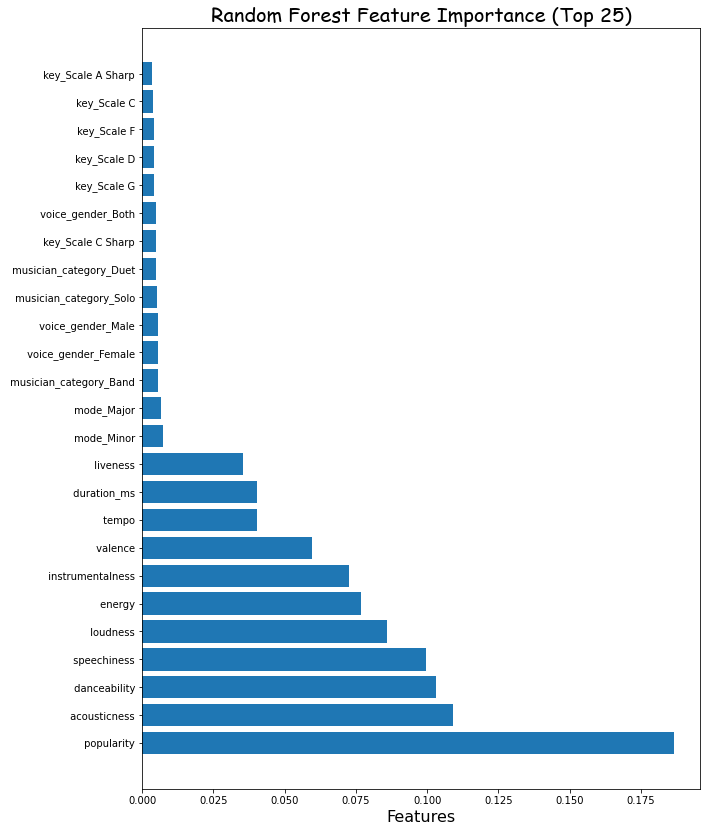

In [329]:
feature_names_25 = [i[0] for i in feature_importances_ranked[:25]]
y_ticks = np.arange(0, len(feature_names_25))
x_axis = [i[1] for i in feature_importances_ranked[:25]]
plt.figure(figsize = (10, 14))
plt.barh(feature_names_25, x_axis)   #horizontal barplot
plt.title('Random Forest Feature Importance (Top 25)',
          fontdict= {'fontname':'Comic Sans MS','fontsize' : 20})
plt.xlabel('Features',fontdict= {'fontsize' : 16})
plt.show()

In [149]:
from sklearn.ensemble import GradientBoostingClassifier # gbm


In [150]:
print('Full Tree Training ACCURACY:', full_tree_fit.score(X_train,
                                                    Y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(X_test,
                                                    Y_test).round(4))
print('ROC AUC score :',roc_auc_score(Y_test, y_score= full_tree_fit.predict_proba(X_test), multi_class='ovr'))


Full Tree Training ACCURACY: 1.0
Full Tree Testing ACCURACY : 0.6694
ROC AUC score : 0.7247242705620364


In [ ]:
full_tree_tp = confusion_matrix(y_true = Y_test, y_pred = full_tree_pred)
print(full_tree_tp)

In [ ]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(Y_test, y_pred_log_test)

In [90]:
model_performance = {
    
    'Model Name'        : ['Logistic Regression',
                           'Classification Trees', 
                           'Random Forest [FINAL]',
                           'Gradient Boosted Models'],
           
    'AUC Score'         : [logreg_auc_score, 
                           tree_tuned_auc, 
                           forest_tuned_auc,
                           gbm_tuned_auc],
    
    'Training Accuracy' : [logreg_train_score, 
                           tree_tuned_train_score,
                           forest_tuned_train_score,
                           full_gbm_train_score],
           
    'Testing Accuracy'  : [logreg_test_score, 
                           tree_tuned_test_score,
                           forest_tuned_test_score,
                           full_gbm_test_score],
    
    'Train-Test Gap'    : [logreg_test_gap,
                           tree_tuned_test_gap,
                           forest_tuned_gap,
                           full_gbm_gap]
}

NameError: name 'tree_tuned_auc' is not defined